# Los datos: partidos y jugadores de todos los mundiales hasta Brasil 2014
link a los archivos: (https://drive.google.com/drive/folders/14qGoWAdkwQRS2m55dszWzF3f0eviAS1k?usp=sharing)

El primero de los dos archivos (*WorldCupMatches.csv*) contiene información sobre partidos individuales de cada mundial desde 1930 hasta 2014, con los siguientes campos (en el mismo orden que en el archivo):


*   Año del mundial
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Equipo local
*   Goles del equipo local
*   Equipo visitante
*   Goles del equipo visitante
*   Cantidad de expectadores en el público
*   Condición de la victoria (e.g. si fue por penales)
*   Goles anotados hasta el primer tiempo por el local
*   Goles anotados hasta el primer tiempo por el visitante
*   Nombre y país del árbitro y los asistentes
*   Un ID único por ronda de mundial y por partido
*   Código de los dos equipos que jugaron el partido

El otro archivo (*WorldCupPlayers.csv*) contiene los jugadores de todos los partidos de todos los mundiales, con los siguientes campos:

*   ID único por ronda de mundial y por partido
*   Iniciales del equipo 
*   Nombre del director técnico
*   Titularidad (S) o suplente (N)
*   Número de camiseta
*   Nombre del jugador
*   Si es arquero (GK) o capitán (C)
*   Eventos asociados al jugador. Solo nos interesan los de la forma *GX'*, *PX'* o *WX'*, que significa que el jugador metió un gol en el minuto X, metió un gol de penal en el minuto X, o bien metió un gol en contra en el minuto X, respectivamente. Hay un evento por gol que haya hecho el jugador en ese partido.

Arranco importante las librerías que se van a utilizar

In [ ]:
import numpy as np # Para manejo de arrays, operaciones matemáticas, etc.
import pandas as pd # Para manejo de base de datos
import matplotlib.pyplot as plt # Para gráficos
import matplotlib
from google.colab import drive # Para montar nuestro drive en la consola
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Subo los dataframes y limpio los datos

In [ ]:
# Dataset jugadores
filename1 = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupPlayers.csv'
# Dataset partidos
filename2 = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupMatches.csv'


# cargo los datasets y los limpio

#1-limpieza jugadores
df_jugadores = pd.read_csv(filename1)
df_jugadores.drop_duplicates(inplace = True) # Tiramos filas duplicadas
df_jugadores.dropna(how = 'all', inplace = True) # Tiramos las filas que sólo contienen nans, esto no elimina las filas que contienen algún nan
print('Esta es la información del data frame de jugadores después de dropear los nan')
print(df_jugadores.info())

#2-limpieza partidos
df_partidos = pd.read_csv(filename2)
df_partidos.drop_duplicates(inplace = True) # Tiramos filas duplicadas
df_partidos.dropna(how = 'all', inplace = True) # Tiramos las filas que sólo contienen nans, esto no elimina las filas que contienen algún nan
print('Esta es la información del data frame de partidos después de dropear los nan')
print(df_partidos.info())


Esta es la información del data frame de jugadores después de dropear los nan
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
 7   Position       4018 non-null   object
 8   Event          8823 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB
None
Esta es la información del data frame de partidos después de dropear los nan
<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0

# Primera consigna


---


1. Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).

2. Hacer un gráfico de barras donde en el eje Y figura la cantidad promedio de goles y en el X aparecen los mundiales, ordenados de izquierda a derecha en cantidad decreciente de goles:


## Resolución

---


Agrego una columna al DataFrame de partidos con la cantidad de goles totales por partido

In [ ]:
col_list = ['Home Team Goals', 'Away Team Goals']
df_partidos['Total Goals'] = df_partidos[col_list].sum(axis=1)

Agrupo los partidos por año de mundial y le calculo el promedio al total de goles.

In [ ]:
df_gol_prom = df_partidos.groupby(['Year'])['Total Goals'].mean().sort_values(ascending = False) #ordeno de mayor a menor el promedio de goles por año de mundial

Finalmente realizo el gráfico de barras de la cantidad promedio de goles y por mundial.

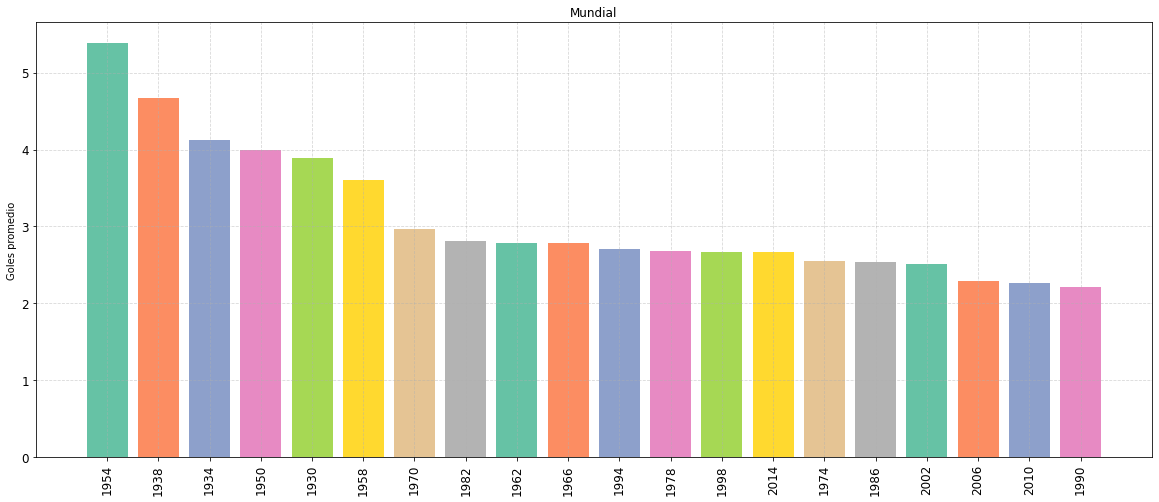

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 8))

ax.set_title('Mundial')
ax.set_ylabel('Goles promedio')

ax.bar(x = [i for i in range(len(df_gol_prom))], # Definimos la ubicación de las barras a lo largo del eje horizontal
           height = df_gol_prom.values , # Definimos la altura de las barras
           color = plt.get_cmap('Set2').colors
           )
ax.set_xticks([i for i in range(len(df_gol_prom))])
ax.set_xticklabels([round(year) for year in df_gol_prom.index],
                       rotation = 90
                       )
ax.tick_params(axis='both', which='major', labelsize = 12)
ax.grid('on', linestyle = 'dashed', alpha = 0.5)


# Segunda consigna

3. Construir un ranking de los países que más partidos ganaron por penales. Representarlo en un gráfico igual que en la consigna anterior.

4. ¿Quién fue el arquero que más partidos ganó por penales?

## Resolución

---

In [ ]:
def ganador_penales(row):
    ht_initials = row['Home Team Initials']
    at_initials = row['Away Team Initials']
    condition = row['Win conditions'] # Esta es la win condition
    # Ahora, seleccionamos mediante el paquete re el resultado de un partido
    # Queremos llevar el "(5-4)" a una lista [5,4] a la cual le preguntaremos en qué posición tiene el máximo (en este caso sería en el elemento 0)
    result = [int(i) for i in re.findall('\(.*\)',condition)[0].replace('(','').replace(')','').replace(' ','').split('-')]
    ganador = [ht_initials, at_initials][np.argmax(result)] # Evalúo en el argmax la lista de posibles ganadores de un partido
    
    return ganador

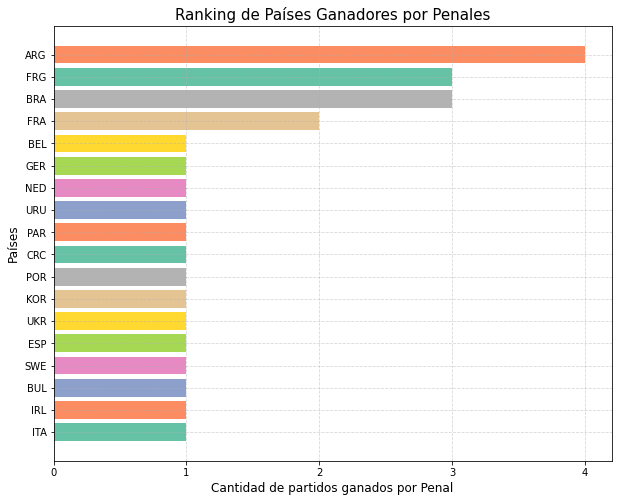

In [ ]:
# Vamos a aplicar la función ganador_penales a df_partidos. Pero sólo a aquellas filas que contengan la palabra penalties en 'Win_conditions'
serie_PaisGanadorPenales = (
    df_partidos[df_partidos['Win conditions'].str.contains('penalties', case = False)]
        .apply(ganador_penales, axis = 1)
        .value_counts()
        .sort_values()
)        
fig, ax = plt.subplots(figsize = (10,8))

ax.set_xlabel('Cantidad de partidos ganados por Penal',
              fontsize = 12)
ax.set_ylabel('Países',
              fontsize = 12)
ax.grid('on',
        linestyle = 'dashed', alpha = 0.5)
ax.barh(y = [i for i in range(len(serie_PaisGanadorPenales))], # Definimos la ubicación de las barras a lo largo del eje horizontal
           width = serie_PaisGanadorPenales.values , # Definimos la altura de las barras
           color = plt.get_cmap('Set2').colors
           )
ax.set_yticks([i for i in range(len(serie_PaisGanadorPenales))])
ax.set_yticklabels([pais for pais in serie_PaisGanadorPenales.index],
                       )
ax.set_xticks([0,1,2,3,4])
ax.set_title('Ranking de Países Ganadores por Penales',
             fontsize = 15)
plt.show()


Extraigo los arqueros más ganadores por penales de la base de jugadores.

In [ ]:
df_penales = df_partidos[df_partidos['Win conditions'].str.contains('penalties')].copy()
df_penales['ganador'] = df_penales.apply(ganador_penales, axis = 1)
df_penales['matchid_ganador'] = df_penales['MatchID'].apply(lambda x: str(int(x))) + df_penales['ganador']
df_jugadores['matchid_pais'] = df_jugadores['MatchID'].apply(lambda x: str(int(x))) + df_jugadores['Team Initials']
d_arqueros_penales = pd.merge(df_penales,
                              df_jugadores[(df_jugadores['Position'] == 'GK') | (df_jugadores['Shirt Number'] == 1)],
                              right_on = 'matchid_pais',
                              left_on = 'matchid_ganador',
                              how = 'inner')
d_arqueros_penales['Event'] = d_arqueros_penales.Event.fillna('')
d_arqueros_penales = d_arqueros_penales[((d_arqueros_penales['Line-up'] == 'S') & ~d_arqueros_penales['Event'].str.contains('O')) | d_arqueros_penales['Event'].str.contains('I')]
serie_arquerosGanadores = d_arqueros_penales['Player Name'].value_counts().sort_values()

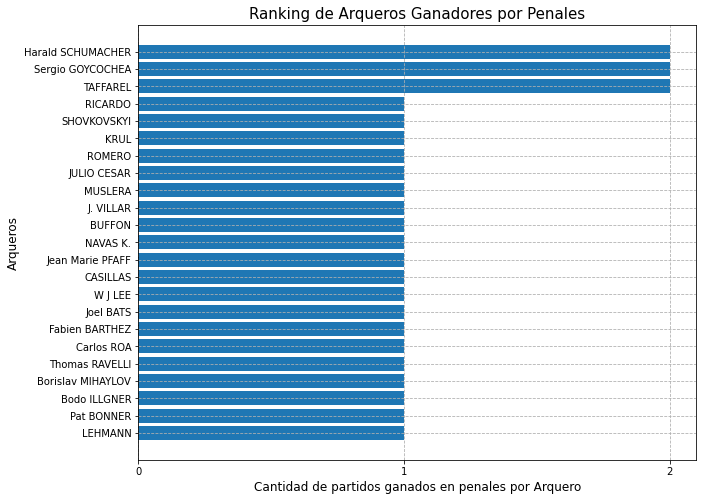

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(y = [i for i in range(len(serie_arquerosGanadores))], # Definimos la ubicación de las barras a lo largo del eje horizontal
           width = serie_arquerosGanadores.values , # Definimos la altura de las barras
           )
ax.set_yticks([i for i in range(len(serie_arquerosGanadores))])
ax.set_yticklabels([pais for pais in serie_arquerosGanadores.index])
ax.set_xticks([0,1,2])
ax.set_xlabel('Cantidad de partidos ganados en penales por Arquero',fontsize = 12)
ax.set_ylabel('Arqueros',fontsize = 12)
ax.grid('on',linestyle = 'dashed')
ax.set_title('Ranking de Arqueros Ganadores por Penales',
             fontsize = 15)
plt.show()

# Tercera consigna

5. Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente. 

6. Hacerlo por separado para la fase de grupos y para la fase de eliminación (todos los partidos posteriores a la fase de grupos).

## Resolución

---

In [ ]:
# Dataset partidos
filename1 = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupMatches.csv' 
filename2 = '/content/drive/My Drive/LaboDatos2022/PrimeraEjercitacion/WorldCupPlayers.csv' 
# Cargamos de base solo aquellas columnas que nos interesa

columnas_partidos = ['MatchID', 'Event']  #nos interesa el ID del partido y los eventos ocurridos
columna_stage = ['MatchID', 'Stage'] 


del dataset de jugadores, filtro de la columna *Event* los goles ya sean metidos, en contra, o por penal, y me quedo unicamente con los minutos en enteros.

In [ ]:
def parse_event(event): return event.replace("'", '').split(' ')  #separa string separados por espacio en una lista

def filtra_goles(string):  #elimina las iniciales de los goles o devuelve Nan si se trata de otro evento
  if string[0] == 'G':
    return int(string[1:])
  elif string[0] == 'P':
    return int(string[1:])
  elif string[0] == 'W':
    return int(string[1:])
  else:
    return np.nan


df_goles = pd.read_csv(filename2, usecols = columnas_partidos)
df_goles = df_goles[~df_goles.Event.isna()].copy()


df_goles.loc[:, 'parsed_Event'] = df_goles.Event.apply(parse_event)

df_goles2 = df_goles.explode('parsed_Event')
df_goles2['parsed_Event'] = df_goles2['parsed_Event'].apply(filtra_goles)
df_goles2.dropna(inplace = True)
df_goles2

,MatchID,Event,parsed_Event
2,1096,G40',40.0
3,1096,G70',70.0
6,1096,G43' G87',43.0
6,1096,G43' G87',87.0
14,1096,G19',19.0
...,...,...,...
37631,300186474,I58' G69' G79',79.0
37701,300186502,G17' O70',17.0
37705,300186502,P3',3.0
37713,300186502,G90',90.0


Distribución de goles a lo largo de 120 minutos.

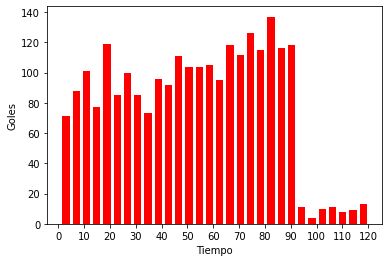

In [ ]:
goles = df_goles2['parsed_Event'].values
plt.hist(goles, bins = 30,rwidth = 0.7, color = "red")
plt.ylabel('Goles')
plt.xlabel('Tiempo')
plt.xticks(np.arange(0,125,10))
plt.show()

In [ ]:
df_stage = pd.read_csv(filename1, usecols = columna_stage)
df_combinado = pd.merge(df_goles2,df_stage,how='inner',on='MatchID')
df_combinado.drop_duplicates(subset =["MatchID", "parsed_Event"], keep = 'first', inplace = True)
df_combinado['Stage'].value_counts()

Group 2                     187
Group 4                     176
Quarter-finals              175
Group 1                     174
Group B                     168
Round of 16                 163
Group A                     160
Group 3                     154
Group C                     126
Group D                     123
Semi-finals                 123
Group E                     121
Group F                      93
Group H                      72
Group G                      70
Final                        68
Match for third place        59
Group 6                      57
First round                  44
Preliminary round            43
Group 5                       9
Third place                   9
Play-off for third place      3
Name: Stage, dtype: int64

In [ ]:
def grupos(string):
  if 'Group' in string:
    return string
  else:
    return np.nan  

def eliminacion(string):
  if not 'Group' in string:
    return string
  else:
    return np.nan  


#data set con partidos de fase de grupos
fase_grupos = df_combinado.copy()
fase_grupos['Stage'] = fase_grupos['Stage'].apply(grupos)
fase_grupos.dropna(inplace = True)
fase_grupos.drop_duplicates(subset =["MatchID", "parsed_Event"], keep = 'first', inplace = True)

#data set con partidos de fase de elimnación
fase_eliminacion = df_combinado.copy()
fase_eliminacion['Stage'] = fase_eliminacion['Stage'].apply(eliminacion)
fase_eliminacion.dropna(inplace = True)
fase_eliminacion.drop_duplicates(subset =["MatchID", "parsed_Event"], keep = 'first', inplace = True)


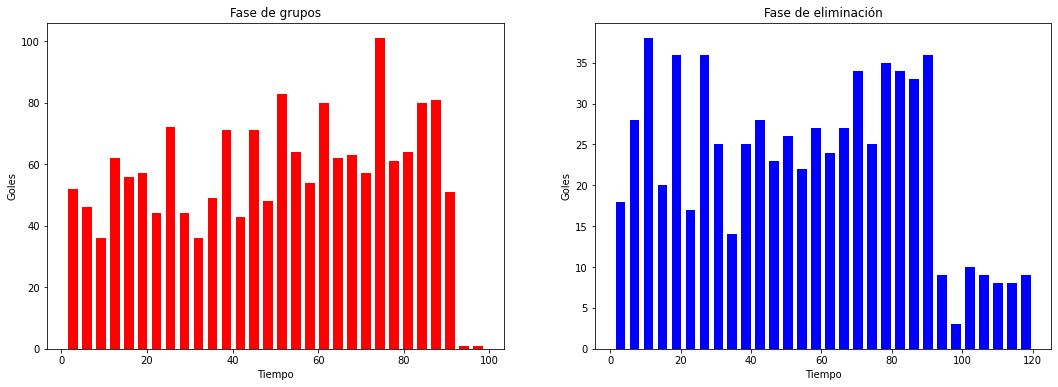

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
#figura 1: distribución fase de grupos
goles1 = fase_grupos['parsed_Event'].values
axs[0].hist(goles1, bins = 30,rwidth = 0.7, color = "red")
axs[0].set_ylabel('Goles')
axs[0].set_xlabel('Tiempo')
axs[0].set_title('Fase de grupos')



goles2= fase_eliminacion['parsed_Event'].values
axs[1].hist(goles2, bins = 30,rwidth = 0.7, color = "blue")
axs[1].set_ylabel('Goles')
axs[1].set_xlabel('Tiempo')
axs[1].set_title('Fase de eliminación')

plt.show()

# Cuarta consigna

7. Para los partidos en los que hubo al menos algún gol, obtener el tiempo que transcurrió hasta el primer gol. h
Hacer un histograma de la distribución de estos valores.

8. Para los partidos en los que hubo más de un gol, obtener los tiempos transcurridos entre goles. Hacer un histograma de la distribución de estos valores.

9. ¿Se parecen estas distribuciones a algunas de las que vimos en clase?



## Resolución

---

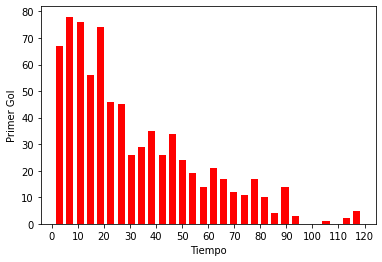

In [ ]:
primer_gol =df_combinado.groupby(['MatchID'])['parsed_Event'].min().values  #todos los primeros goles 

plt.hist(primer_gol, bins = 30,rwidth = 0.7, color = "red")
plt.ylabel('Primer Gol')
plt.xlabel('Tiempo')
plt.xticks(np.arange(0,125,10))
plt.show()

Ordenamos los goles y calculamos la diferencia entre goles por partido (con el ID del partido)

In [ ]:
df_combinado2 = df_combinado.sort_values(by=['parsed_Event'])
diferencia_goles = df_combinado2.groupby(['MatchID'])['parsed_Event'].diff()
diferencia_goles.dropna()

2325     1.0
353      1.0
1203     2.0
1876     2.0
615      5.0
        ... 
174      7.0
167     14.0
2368    28.0
2055     1.0
754     19.0
Name: parsed_Event, Length: 1611, dtype: float64

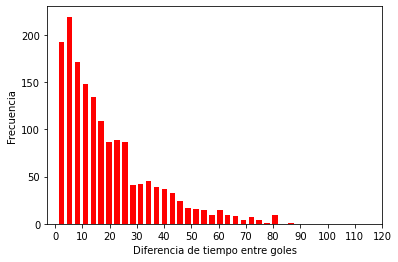

In [ ]:

plt.hist(diferencia_goles, bins = 30,rwidth = 0.7, color = "red")
plt.xlabel('Diferencia de tiempo entre goles')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(0,125,10))
plt.show()

La distribución de los últimos dos histogramas presentan un comportamiento similar al dado por la ley de potencias.